In [2]:
import pandas as pd
import numpy as nm
import matplotlib
import sklearn
from sklearn import svm, preprocessing

df = pd.read_csv('datasets/Police_Department_Incidents_-_Previous_Year__2016_.csv')
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [3]:
crime = 'ROBBERY' # any category
x_axs = 'Time' # time, day of week, date

df.sort_values(x_axs, inplace=True)

#creating unique keys and (values as tables)
cat = df.groupby('Category')
new_df = cat.get_group(crime)

new_df



,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
104235,160998020,ROBBERY,"ROBBERY, ARMED WITH A GUN",Friday,12/09/2016 12:00:00 AM,00:01,BAYVIEW,NONE,RHODEISLAND ST / 23RD ST,-122.401590,37.754570,"(37.7545698243645, -122.401590336879)",16099802003071
38542,160028542,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Sunday,01/10/2016 12:00:00 AM,00:01,NORTHERN,NONE,FILLMORE ST / OFARRELL ST,-122.432707,37.783291,"(37.7832909416362, -122.432706975892)",16002854203014
3770,160183215,ROBBERY,"ROBBERY, ARMED WITH A DANGEROUS WEAPON",Wednesday,03/02/2016 12:00:00 AM,00:01,TENDERLOIN,NONE,200 Block of LEAVENWORTH ST,-122.414218,37.783259,"(37.7832593295025, -122.414217804322)",16018321503073
62895,160637767,ROBBERY,"ROBBERY, ARMED WITH A GUN",Monday,08/08/2016 12:00:00 AM,00:01,PARK,NONE,PAGE ST / SCOTT ST,-122.435566,37.772416,"(37.7724156608806, -122.435566188652)",16063776703071
63507,160643479,ROBBERY,"ROBBERY, BODILY FORCE",Wednesday,08/10/2016 12:00:00 AM,00:01,SOUTHERN,NONE,0 Block of MISSION ST,-122.392889,37.793539,"(37.7935385958356, -122.392889145798)",16064347903074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,160157975,ROBBERY,ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE,Monday,02/22/2016 12:00:00 AM,23:58,BAYVIEW,"ARREST, BOOKED",3RD ST / EVANS AV,-122.387927,37.742703,"(37.7427030847405, -122.387927387609)",16015797503414
21225,160443423,ROBBERY,"ROBBERY, BODILY FORCE",Monday,05/30/2016 12:00:00 AM,23:58,MISSION,NONE,0 Block of HOFF ST,-122.420576,37.764182,"(37.7641819463712, -122.420575720933)",16044342303074
20687,160444487,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,05/26/2016 12:00:00 AM,23:59,CENTRAL,NONE,400 Block of MASON ST,-122.409925,37.787764,"(37.7877640990096, -122.409925328419)",16044448703074
102615,160983883,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Saturday,12/03/2016 12:00:00 AM,23:59,INGLESIDE,NONE,300 Block of PRECITA AV,-122.412464,37.747292,"(37.7472920540286, -122.41246383674)",16098388303011


In [4]:
#keeping in as in index in data frame
if (x_axs == 'DayOfWeek') :
    lst = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    final_df = pd.DataFrame(lst)
    indexing_array = lst
    
else :
    final_df = pd.DataFrame(new_df[x_axs].unique())
    indexing_array = new_df[x_axs].unique()
    
final_df['sum'] = ''
final_df.rename(columns = {final_df.columns[0]: x_axs}, inplace = True )



In [5]:
#circluting through a unique list
import datetime
from datetime import time


counter = 0

for hum in indexing_array:        
    ser = new_df[new_df[x_axs] == hum].count()
    final_df.set_value(counter, 'sum', ser[0])
    counter +=1

final_df



c:\users\isaks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


,Time,sum
0,00:01,35
1,00:03,3
2,00:04,1
3,00:05,13
4,00:07,2
...,...,...
892,23:48,2
893,23:50,10
894,23:55,10
895,23:58,3


In [6]:
# graphing
final_df.columns = [x_axs, crime]
#final_df.set_index(x_axs, inplace =True)
#final_df[crime].rolling(10).sum().plot(figsize=(20,8))
final_df.plot(x = 'Time',figsize=(10,4))

c:\users\isaks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
c:\users\isaks\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:39: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


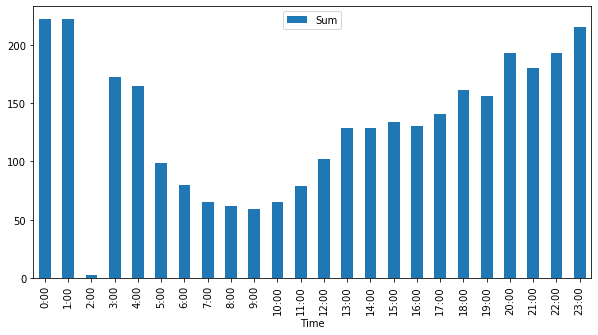

In [8]:
#now we have to iterate through these hours and half hours
import datetime
from datetime import time

lis = ['0:00','1:00','2:00','3:00',
       '4:00','5:00','6:00','7:00',
       '8:00','9:00','10:00','11:00',
       '12:00','13:00','14:00','15:00',
       '16:00','17:00','18:00','19:00',
       '20:00','21:00','22:00','23:00']

ffinal_df = pd.DataFrame(lis)
ffinal_df['Sum'] = ''

hours = 1
only_wholes = time(hour = hours, minute = 0, second = 0)
counter_for_rolling = 0
counter_for_rolling_head = 0
counter_for_rolling_tail = 0

for hum in indexing_array:
     #counting all the instances in the full list
    time_obj = datetime.datetime.strptime(hum,'%H:%M')
    if (time_obj.time() > only_wholes and hours < 24):
        
        counter_for_rolling_head = counter_for_rolling_tail  
        counter_for_rolling_tail += counter_for_rolling 
        
       # print(counter_for_rolling_head)
       # print(counter_for_rolling_tail)
       # print(counter_for_rolling)
        
        #slicing the row with the crimes and summing them per hour
        hourly_value = final_df.loc[counter_for_rolling_head : counter_for_rolling_tail, crime].sum()
        
        if (hours == 1):
            ffinal_df.set_value(0, 'Sum', hourly_value)
            
        ffinal_df.set_value(hours, 'Sum', hourly_value)
        
        counter_for_rolling = 0
        only_wholes = time(hours, 0, 0)
        hours +=1
       # print('-----------------')
    counter_for_rolling +=1

######################################

ffinal_df.rename(columns = {ffinal_df.columns[0]: 'Time'}, inplace = True)
ffinal_df.plot.bar(x= 'Time', y='Sum',figsize=(10,5))

#final_df.loc[0 : 10, 'sum'].sum()
#ffinal_df.set_value(0,'Sum',11)
#ffinal_df